In [1]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re

train = pd.read_csv("../Wikipedia/train_1.csv").fillna(0)
print(train.head())
print(train.info())

                                                Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         0.0         0.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-09     ...      2016-12-22  2016-12-23  2016-

In [2]:

def lang(Page):
    val = re.search('[a-z][a-z].wikipedia.org',Page)
    if val:
        return val[0][0:2]           
    

    return 'no_lang'

train['language'] = train.Page.map(lang)

# Article Count 
print("\nArticle count as per Language : \n", Counter(train.language))


Article count as per Language : 
 Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'no_lang': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [3]:
language_set = {}
language_set['en'] = train[train.language=='en'].iloc[:,0:-1]
language_set['ja'] = train[train.language == 'ja'].iloc[:, 0:-1]
language_set['de'] = train[train.language == 'de'].iloc[:, 0:-1]
language_set['fr'] = train[train.language == 'fr'].iloc[:, 0:-1]
language_set['ru'] = train[train.language == 'ru'].iloc[:, 0:-1]
language_set['es'] = train[train.language == 'es'].iloc[:, 0:-1]
language_set['no_lang'] = train[train.language == 'no_lang'].iloc[:, 0:-1]

for key in language_set:
    print("KEY : ", language_set[key],"\n")


KEY :                                                       Page  2015-07-01  \
8357            !vote_en.wikipedia.org_desktop_all-agents         3.0   
8358    "Awaken,_My_Love!"_en.wikipedia.org_desktop_al...         0.0   
8359    "European_Society_for_Clinical_Investigation"_...         0.0   
8360    "Weird_Al"_Yankovic_en.wikipedia.org_desktop_a...      2403.0   
8361       100_metres_en.wikipedia.org_desktop_all-agents       982.0   
8362    10_Cloverfield_Lane_en.wikipedia.org_desktop_a...         0.0   
8363    10_Gigabit_Ethernet_en.wikipedia.org_desktop_a...      1078.0   
8364    13_Hours:_The_Secret_Soldiers_of_Benghazi_en.w...         0.0   
8365             1551_en.wikipedia.org_desktop_all-agents        11.0   
8366    1896_Summer_Olympics_en.wikipedia.org_desktop_...       366.0   
8367    1918_flu_pandemic_en.wikipedia.org_desktop_all...       868.0   
8368    1923_San_Pedro_Maritime_Strike_en.wikipedia.or...         1.0   
8369    1936_Summer_Olympics_en.wikipedia.or

KEY :                                                       Page  2015-07-01  \
69479      100_metros_es.wikipedia.org_desktop_all-agents       390.0   
69480   10_Cloverfield_Lane_es.wikipedia.org_desktop_a...         0.0   
69481   12_de_octubre_es.wikipedia.org_desktop_all-agents        99.0   
69482   13_de_septiembre_es.wikipedia.org_desktop_all-...        77.0   
69483   15_de_septiembre_es.wikipedia.org_desktop_all-...        90.0   
69484   1984_(novela)_es.wikipedia.org_desktop_all-agents       772.0   
69485            1992_es.wikipedia.org_desktop_all-agents       313.0   
69486   29_de_febrero_es.wikipedia.org_desktop_all-agents        97.0   
69487   300:_Rise_of_an_Empire_es.wikipedia.org_deskto...       180.0   
69488   420_(cannabis)_es.wikipedia.org_desktop_all-ag...       293.0   
69489      4_de_marzo_es.wikipedia.org_desktop_all-agents        31.0   
69490    5_de_febrero_es.wikipedia.org_desktop_all-agents        74.0   
69491     A.J._Styles_es.wikipedia.org_deskt

In [4]:
total_view = {} 
for key in language_set:
    total_view[key] = language_set[key].iloc[:, 1:].sum(axis=0) / language_set[key].shape[0]


for key in language_set:
    print("KEY : ", key)
    print("\nTotal_Value KEY : \n", total_view[key])



KEY :  en

Total_Value KEY : 
 2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
2015-07-06    3849.736021
2015-07-07    3643.523063
2015-07-08    3437.871080
2015-07-09    3517.459391
2015-07-10    3497.571594
2015-07-11    3517.054297
2015-07-12    3869.211216
2015-07-13    3832.417662
2015-07-14    3854.165298
2015-07-15    3563.026589
2015-07-16    3605.074747
2015-07-17    3455.528829
2015-07-18    3335.306288
2015-07-19    3540.557533
2015-07-20    3720.901319
2015-07-21    3544.275386
2015-07-22    3488.537249
2015-07-23    3435.995645
2015-07-24    3340.325991
2015-07-25    3346.974988
2015-07-26    3585.658246
2015-07-27    3643.563216
2015-07-28    3589.972955
2015-07-29    4189.383649
2015-07-30    3283.135930
                 ...     
2016-12-02    4540.718351
2016-12-03    5119.283350
2016-12-04    5171.994400
2016-12-05    5281.185830
2016-12-06    5239.822217
2016-12-07    4938.917579
2016-12

In [5]:
days = [r for r in range(total_view['en'].shape[0])]

In [6]:
plot.figure(figsize=(8, 6))
labels={'ja':'Japanese','de':'German','en' : 'English','no_lang':'Media_File','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'}


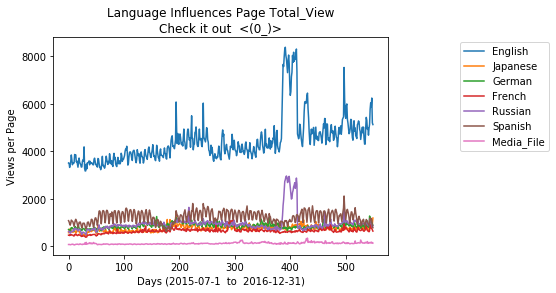

In [7]:
for key in total_view:
    plot.plot(days,total_view[key],label = labels[key])
    plot.ylabel('Views per Page')
plot.xlabel('Days (2015-07-1  to  2016-12-31)')
plot.title('Language Influences Page Total_View\nCheck it out  <(0_)>')
plot.legend(loc = 'upper left', bbox_to_anchor = (1.2, 1))
plot.show()

No handles with labels found to put in legend.


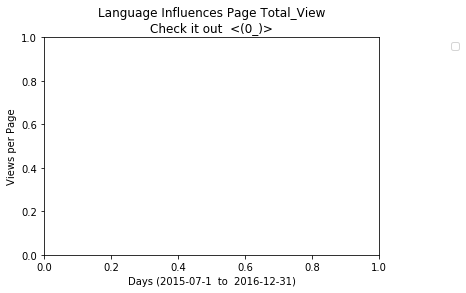

In [8]:
plot.ylabel('Views per Page')
plot.xlabel('Days (2015-07-1  to  2016-12-31)')
plot.title('Language Influences Page Total_View\nCheck it out  <(0_)>')
plot.legend(loc ='upper left', bbox_to_anchor = (1.2, 1))
plot.show()

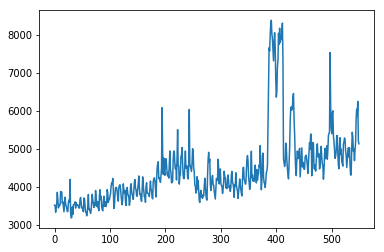

In [9]:
plot.plot(days,total_view['en'],label=labels['en'])
plot.show()

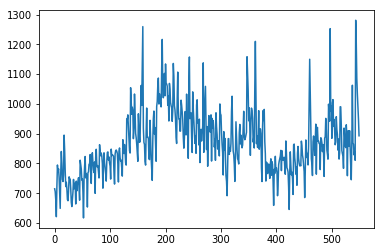

In [10]:
plot.plot(days,total_view['de'],label=labels['de'])
plot.show()

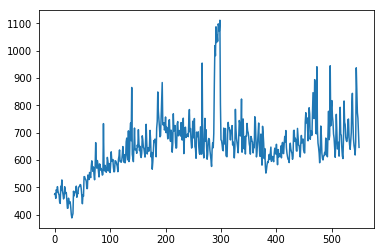

In [11]:
plot.plot(days,total_view['fr'],label=labels['de'])
plot.show()

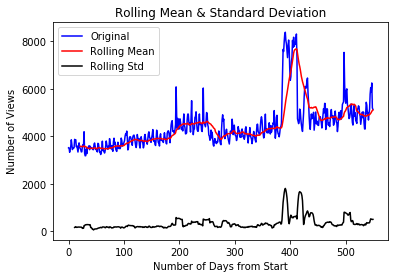

ADF Stastistic: -2.247284
p-value: 0.189534
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [25]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):
     #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x.values, color='blue',label='Original')
    mean = plot.plot(rolmean.values, color='red', label='Rolling Mean')
    std = plot.plot(rolstd.values, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.xlabel('Number of Days from Start')
    plot.ylabel('Number of Views')
    plot.show(block=False)
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key, value))
test_stationarity(total_view['en'])


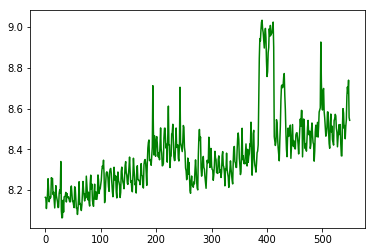

In [13]:
ts_log = np.log(total_view['en'])
plot.plot(ts_log.values,color="green")
plot.show()

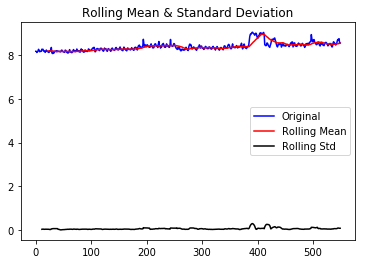

ADF Stastistic: -2.032439
p-value: 0.272533
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [22]:
test_stationarity(ts_log)

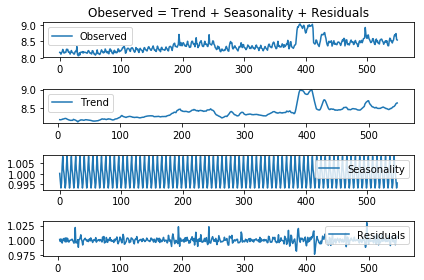

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log.values, model='multiplicative',freq = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plot.subplot(411)
plot.title('Obeserved = Trend + Seasonality + Residuals')
plot.plot(ts_log.values,label='Observed')
plot.legend(loc='best')
plot.subplot(412)
plot.plot(trend, label='Trend')
plot.legend(loc='best')
plot.subplot(413)
plot.plot(seasonal,label='Seasonality')
plot.legend(loc='best')
plot.subplot(414)
plot.plot(residual, label='Residuals')
plot.legend(loc='best')
plot.tight_layout()
plot.show()


In [16]:

ts_log_decompose = residual

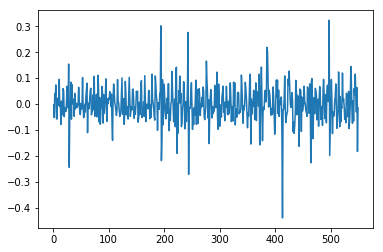

In [17]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff.values)

plot.show()

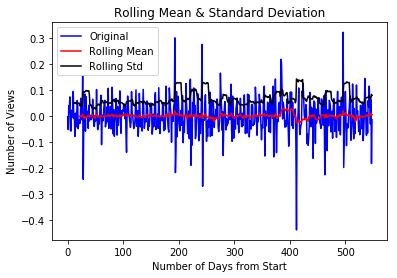

ADF Stastistic: -8.154260
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [26]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

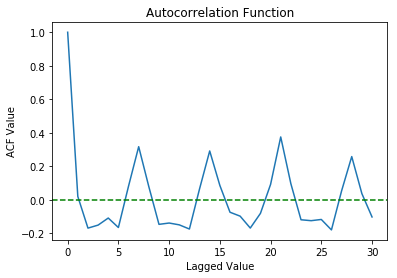

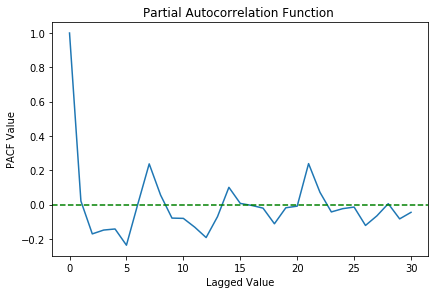

In [29]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

lag_acf = acf(ts_log_diff, nlags=30)
lag_pacf = pacf(ts_log_diff, nlags=30, method='ols')

#Plot ACF: 
plot.subplot(1,1,1)

plot.plot(lag_acf)
#print(lag_acf[0.5])


plot.axhline(y=0,linestyle='--',color='g')
plot.title('Autocorrelation Function')
plot.xlabel('Lagged Value')
plot.ylabel('ACF Value')
plot.show()

#Plot PACF:
plot.subplot(1,1,1)
plot.plot(lag_pacf)

plot.axhline(y=0,linestyle='--',color='green')
plot.title('Partial Autocorrelation Function ')
plot.tight_layout()
plot.xlabel('Lagged Value')
plot.ylabel('PACF Value')
plot.show()


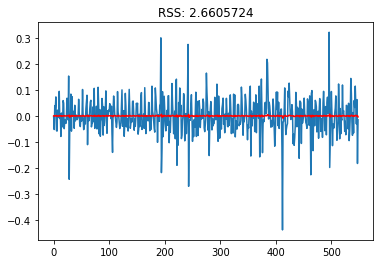

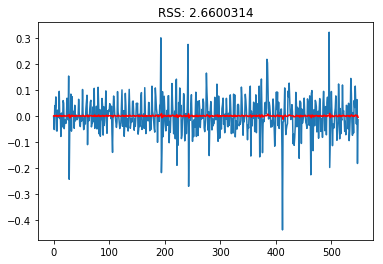

In [49]:
model = ARIMA(ts_log.values, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff.values)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plot.show()


model = ARIMA(ts_log.values, order=(0,1,1))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff.values)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plot.show()

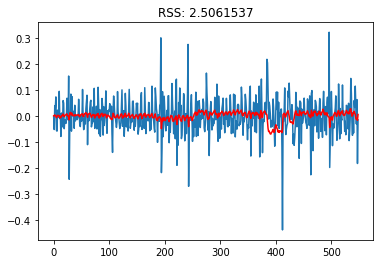

In [50]:
model = ARIMA(ts_log.values, order=(1,1,1))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff.values)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plot.show()


In [51]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  549
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 699.951
Method:                       css-mle   S.D. of innovations              0.067
Date:                Thu, 14 Feb 2019   AIC                          -1391.902
Time:                        12:37:41   BIC                          -1374.670
Sample:                             1   HQIC                         -1385.167
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      5.830      0.000       0.001       0.001
ar.L1.D.y      0.8753      0.021     41.812      0.000       0.834       0.916
ma.L1.D.y     -1.0000      0.005   -182.567      0.0

In [52]:
size = int(len(ts_log)-100)
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

In [53]:
print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit(disp=0)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    

Printing Predicted vs Expected Values...




In [54]:
 error = ((abs(pred_value - original_value)) / original_value) * 100
error_list.append(error)
print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
predictions.append(float(pred_value))
originals.append(float(original_value))
    
    #error = mean_squared_error(dragon.exp(yhat), dragon.exp(obs))
    #print('mean_squared_error : ', error)
print('\n Means Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')




predicted = 5235.741268,   expected = 5127.916418,   error = 2.102703  %

 Means Error in Predicting Test Case Articles : 2.102703  %


In [56]:
size = int(len(ts_log)-100)
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit(disp=0)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
    #error = mean_squared_error(dragon.exp(yhat), dragon.exp(obs))
    #print('mean_squared_error : ', error)
print('\n Means Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

Printing Predicted vs Expected Values...


predicted = 4598.532070,   expected = 4461.695661,   error = 3.066915  %
predicted = 4545.847438,   expected = 4456.174589,   error = 2.012328  %
predicted = 4540.171925,   expected = 4775.697611,   error = 4.931755  %
predicted = 4830.782739,   expected = 4818.150572,   error = 0.262179  %
predicted = 4869.845915,   expected = 4824.929940,   error = 0.930915  %
predicted = 4876.101168,   expected = 4704.449021,   error = 3.648719  %
predicted = 4766.951496,   expected = 4559.138958,   error = 4.558153  %
predicted = 4634.348591,   expected = 4347.536502,   error = 6.597117  %
predicted = 4439.972507,   expected = 4645.420275,   error = 4.422587  %
predicted = 4711.544906,   expected = 4904.789282,   error = 3.939912  %
predicted = 4947.160534,   expected = 5161.465903,   error = 4.152025  %
predicted = 5178.931936,   expected = 4982.463373,   error = 3.943201  %
predicted = 5018.832501,   expected = 5385.581882,   error = 6.809838  %
predicte

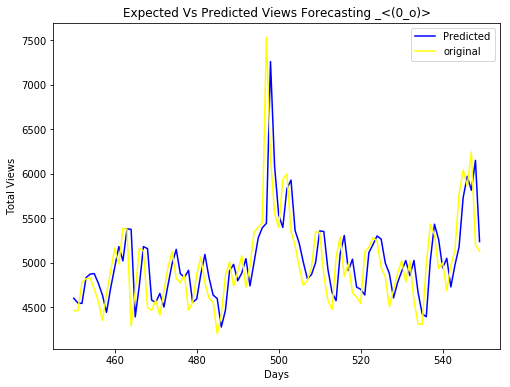

In [57]:
plot.figure(figsize=(8, 6))
test_day = [t+450
           for t in range(len(test_arima))]
labels={'Predicted','original'}
plot.plot(test_day, predictions, color= 'Blue')
plot.plot(test_day, originals, color = 'yellow')
plot.title('Expected Vs Predicted Views Forecasting _<(0_o)>')
plot.xlabel('Days')
plot.ylabel('Total Views')
plot.legend(labels)
plot.show()

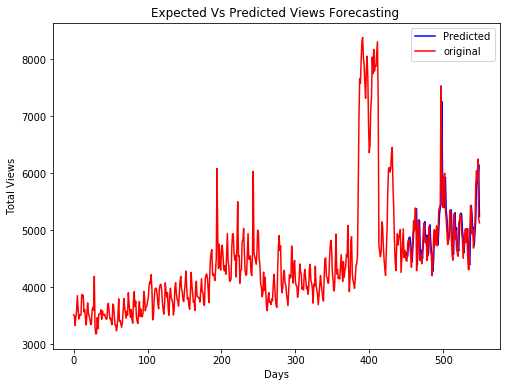

In [58]:
plot.figure(figsize=(8, 6))
test_day = [t+450
           for t in range(len(test_arima))]
labels={'Predicted','original'}
plot.plot(test_day, predictions, color= 'blue')
plot.plot(days, total_view['en'], color = 'red')
plot.title('Expected Vs Predicted Views Forecasting ')
plot.xlabel('Days')
plot.ylabel('Total Views')
plot.legend(labels)
plot.show()